### Imports

In [79]:
import sys
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

# Caminho da pasta "Twitch"
base_dir = Path(os.getcwd()).resolve().parent  # Ajuste se necessário

# Adicionar as pasta ao sys.path
visualization_dir = base_dir / 'src' / 'visualization'
getData_dir = base_dir / 'src' / 'data'
sys.path.append(str(visualization_dir))
sys.path.append(str(getData_dir))

# Importar os módulos
try:
    import TwitchGraphs
except ImportError:
    print("Erro: Não foi possível importar algum módulo. Verifique se o caminho está correto.")

# Paises
countries = ["PTBR", "DE", "ENGB", "ES", "FR", "RU"]

# Configuração de estilo dos gráficos
TwitchGraphs.setup_style()

In [80]:
# Alterar o país para analisar
country = 'RU'

## Visualizar os novos Dados

### Guardar os dados em um dicionário

In [81]:
# Criar um dicionário para armazenar os dataframes
dfs = {}

# Carregar dados para cada país
for country1 in countries:
    file_path = base_dir / 'data' / country1 / 'processed_data' / f'Raw_musae_{country1}_target.csv'
    dfs[country1] = pd.read_csv(file_path)

In [82]:
countryData = dfs[country]
print(countryData)

markdown_conteudo = f"# Análise da Região {country}"
# Em vez de criar os gráficos diretamente, usar as funções do TwitchGraphs
output_dir = base_dir / 'docs' / "Imagens"

             id  days  mature  views  partner  new_id        username  \
0      43622128  1910   False   2002    False    1076        Iggy5557   
1      32314097  2273    True   1885    False    1090    AnnoArincass   
2     112985248   998   False  14538    False     633          Blifer   
3      54595718  1738    True   8541    False    2238          Wape98   
4      72920173  1461   False  49854    False    1662         KaverTV   
...         ...   ...     ...    ...      ...     ...             ...   
4380   89307159  1267   False  31085    False    3249      JoystickNS   
4381   91304162  1244   False  37971    False    2287        LoliRuri   
4382  142285340   663   False  24686    False    1095  vika_supernova   
4383   46489985  1885   False  12129    False     207         Wanzaro   
4384  135692583   742    True  10984    False     156           KPV03   

      created_at                                        profile_pic  \
0     2013-05-17  https://static-cdn.jtvnw.net/jtv_u

In [83]:
display(Markdown(markdown_conteudo))

# Análise da Região RU

In [84]:
print(f"\n=== Análise para {country} ===")

# Tipos de dados
print("\nTipos de dados:")
print(countryData.dtypes)



=== Análise para RU ===

Tipos de dados:
id                   int64
days                 int64
mature                bool
views                int64
partner               bool
new_id               int64
username            object
created_at          object
profile_pic         object
broadcaster_type    object
game_name           object
dtype: object


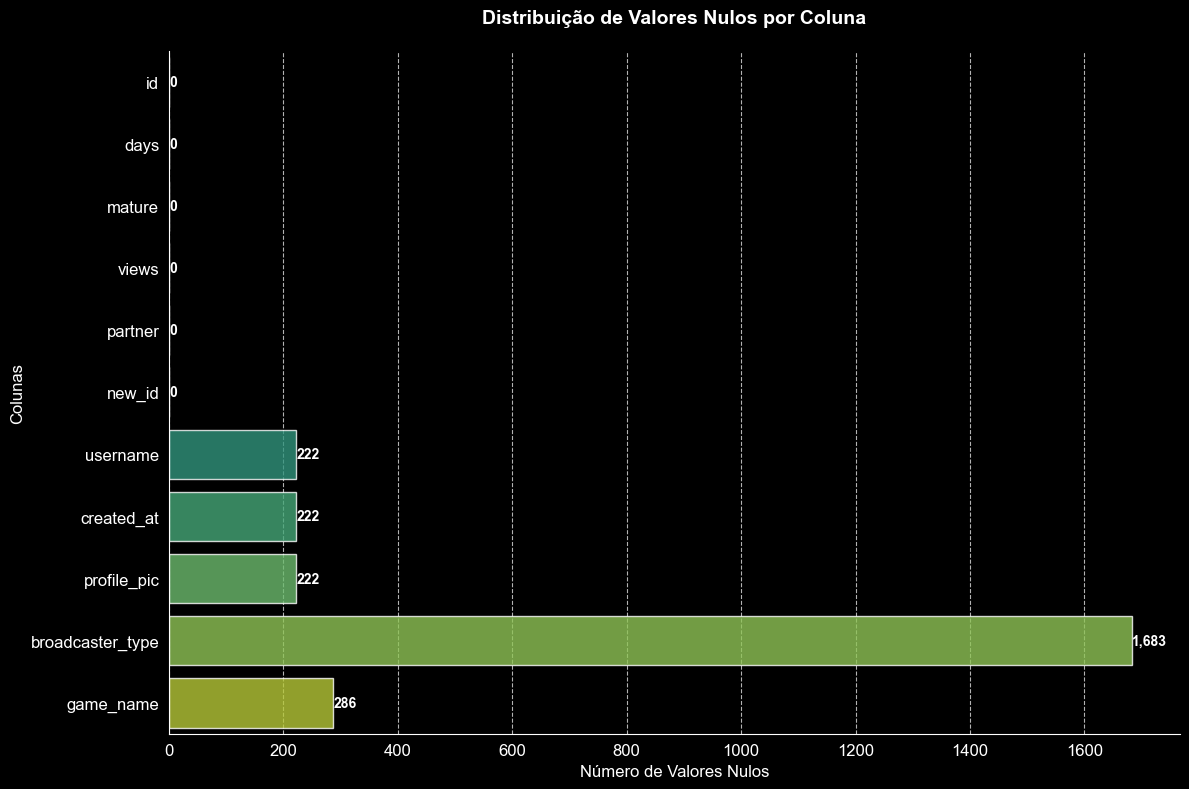

In [85]:
TwitchGraphs.plot_null_distribution(countryData, country, output_dir)

In [86]:
# Guardar o número de linhas original
linhas_originais = len(countryData)

# Atualizar a coluna 'broadcaster_type' com base nos valores nulos em 'username'
df_clean = countryData.copy()
df_clean.loc[df_clean['username'].isna(), 'broadcaster_type'] = 'account_Deleted'
df_clean.loc[df_clean['broadcaster_type'].isna(), 'broadcaster_type'] = 'non_Streamer'

# Mostrar informação sobre as linhas modificadas
linhas_modificadas = len(df_clean[df_clean['broadcaster_type'] == 'account_Deleted'])
print(f"Linhas originais: {linhas_originais}")
print(f"Linhas com username nulo alteradas para 'account_Deleted': {linhas_modificadas}")
print(f"Linhas após processamento: {len(df_clean)}")
print(f"Percentagem de dados mantidos: {(len(df_clean)/linhas_originais)*100:.2f}%")

Linhas originais: 4385
Linhas com username nulo alteradas para 'account_Deleted': 222
Linhas após processamento: 4385
Percentagem de dados mantidos: 100.00%


broadcaster_type
affiliate          2310
non_Streamer       1461
partner             392
account_Deleted     222
Name: count, dtype: int64


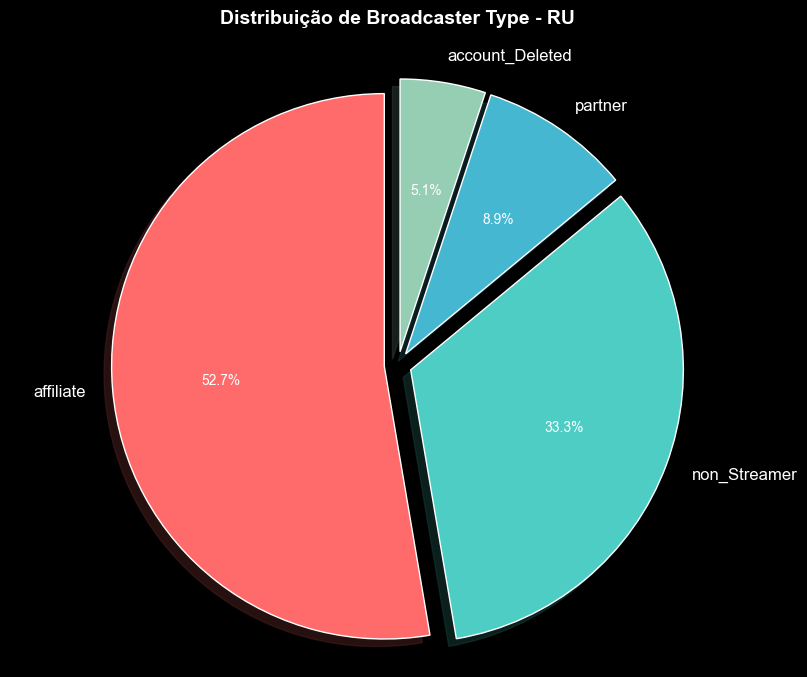

In [87]:
TwitchGraphs.plot_broadcaster_distribution(df_clean, country, output_dir)

mature
False    3310
True     1075
Name: count, dtype: int64


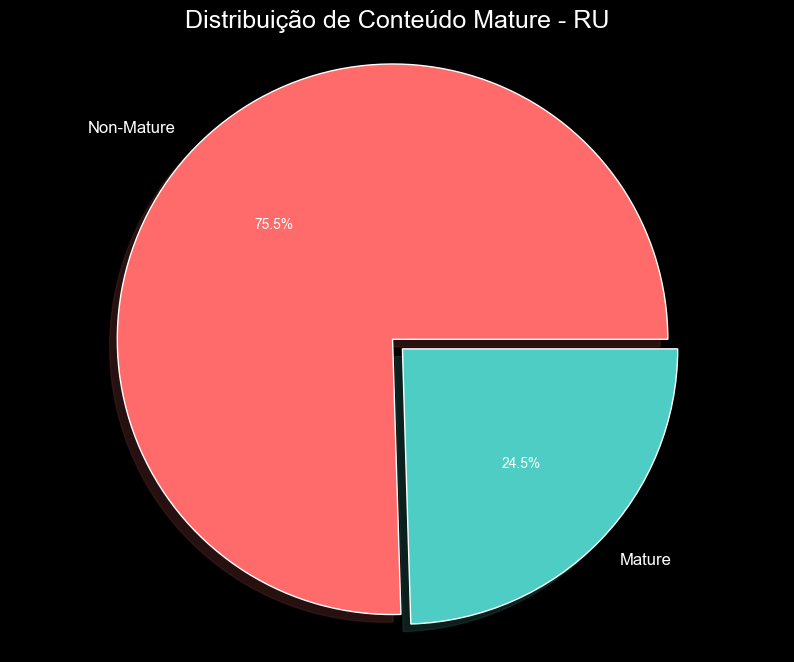

In [88]:
# Usar as funções do TwitchGraphs para criar os gráficos
TwitchGraphs.plot_mature_content(df_clean, country, output_dir)

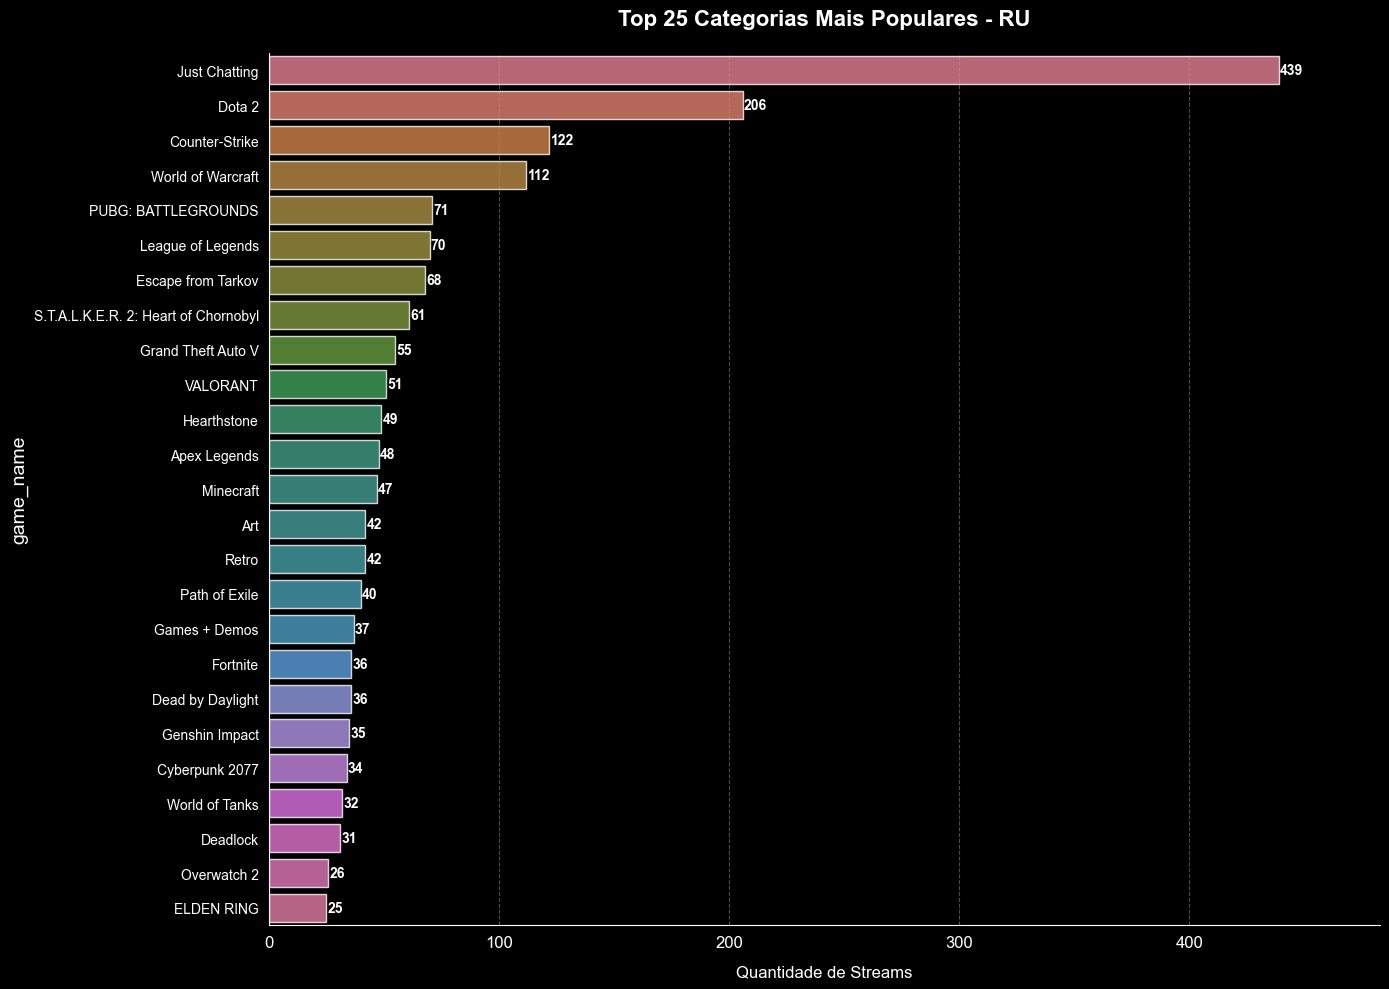

In [89]:
TwitchGraphs.plot_game_categories(df_clean, country, output_dir)

In [90]:
# Definir o nome da nova pasta
new_folder_name = "processed_data"

# Caminho para a nova pasta
new_folder_path = base_dir / 'data' / country / new_folder_name

# Criar a nova pasta se ela não existir
new_folder_path.mkdir(parents=True, exist_ok=True)

# Caminho para o ficheiro dentro da nova pasta
file_path = new_folder_path / f'Final_musae_{country}_target.csv'

# Salvar o DataFrame limpo no novo diretório
df_clean.to_csv(file_path, index=False)
print(f"Dados salvos em: {file_path}")

Dados salvos em: C:\Users\diogo\Desktop\ARA\Projeto\Twitch\data\RU\processed_data\Final_musae_RU_target.csv


## Eliminar ligações inúteis

In [91]:
# Carregar o arquivo de edges
edge_path = base_dir / 'data' / country / f'musae_{country}_edges.csv'
edges_df = pd.read_csv(edge_path)

print("Número de edges antes da filtragem:", len(edges_df))

# Converter os IDs para o mesmo tipo (int64)
edges_df['from'] = edges_df['from'].astype('int64')
edges_df['to'] = edges_df['to'].astype('int64')
df_clean['new_id'] = df_clean['new_id'].astype('int64')

# Criar um conjunto com os IDs válidos do df_clean
valid_ids = set(df_clean['new_id'].values)

# Filtrar as edges para manter apenas aquelas onde ambos os nós existem em valid_ids
filtered_edges = edges_df[
    edges_df['from'].isin(valid_ids) & 
    edges_df['to'].isin(valid_ids)
]

print("Número de edges após a filtragem:", len(filtered_edges))

# Salvar o novo arquivo de edges filtrado
filtered_edge_path = base_dir / 'data' / country / f'Final_musae_{country}_edges.csv'
filtered_edges.to_csv(filtered_edge_path, index=False)
print(f"Edges filtradas salvas em: {filtered_edge_path}")

# Mostrar algumas estatísticas
print("\nEstatísticas:")
print(f"Edges removidas: {len(edges_df) - len(filtered_edges)}")
print(f"Porcentagem de edges mantidas: {(len(filtered_edges)/len(edges_df))*100:.2f}%")

Número de edges antes da filtragem: 37304
Número de edges após a filtragem: 37304
Edges filtradas salvas em: C:\Users\diogo\Desktop\ARA\Projeto\Twitch\data\RU\Final_musae_RU_edges.csv

Estatísticas:
Edges removidas: 0
Porcentagem de edges mantidas: 100.00%
